### Clustering Algorithm

<font size="4">Using  the Iris dataset available in the sklearn library.</font>

#### Load the iris dataset

In [71]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()


In [8]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
import pandas as pd
import numpy as np
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### data preprocessing 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [12]:
list(df)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'species']

In [13]:
df.shape

(150, 5)

### Duplicates check

In [14]:
df.duplicated().sum()

1

In [15]:
df = df.drop_duplicates()

In [16]:
df.duplicated().sum()

0

In [17]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [18]:
features = df.drop('species', axis=1)
features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [20]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### checking outlier

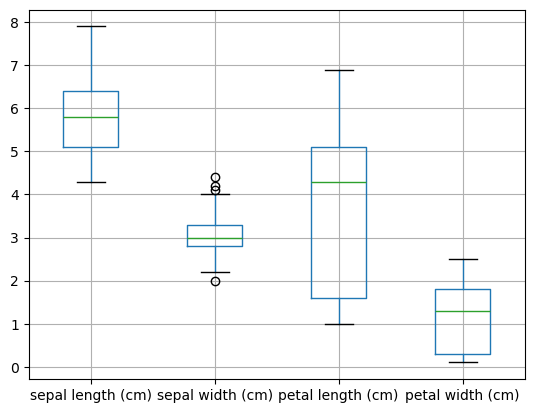

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
df.boxplot()
plt.show()

### Handling Outliers

### IQR Method sepal width

In [22]:
q1=df['sepal width (cm)'].quantile(0.25)
q3=df['sepal width (cm)'].quantile(0.75)
IQR=q3-q1

In [23]:
q1,q3,IQR

(2.8, 3.3, 0.5)

In [24]:
upper_limit=q3+(1.5*IQR)
lower_limit=q1-(1.5*IQR)
lower_limit,upper_limit

(2.05, 4.05)

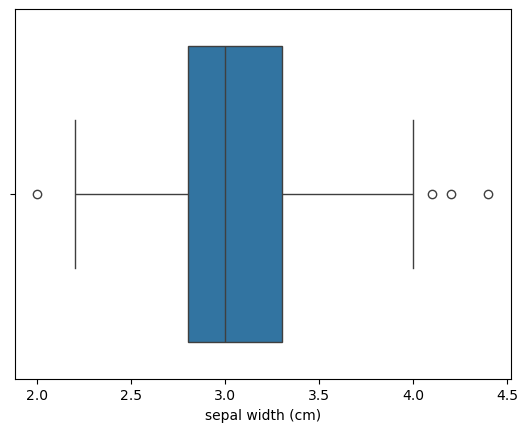

In [25]:
sns.boxplot(x=df['sepal width (cm)'])
plt.show()

In [26]:
df.loc[(df['sepal width (cm)']>upper_limit)|(df['sepal width (cm)']<lower_limit)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


In [27]:
# Caping
new_df=df.copy()
new_df.loc[(new_df['sepal width (cm)']>upper_limit),'sepal width (cm)']=upper_limit
new_df.loc[(new_df['sepal width (cm)']<lower_limit),'sepal width (cm)']=lower_limit

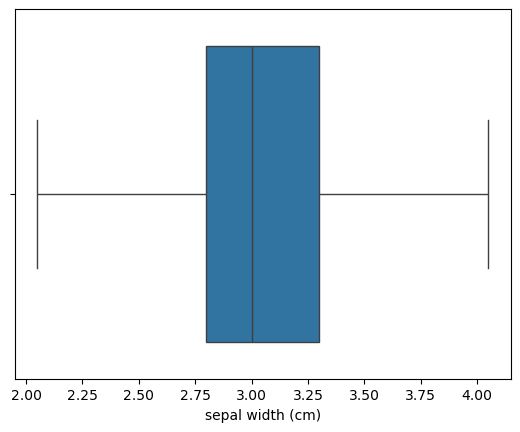

In [28]:
sns.boxplot(x=new_df['sepal width (cm)'])
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [30]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Clustering Algorithm Implementation 

### K-Means clustering
<font size="5">KMeans clustering is an unsupervised machine learning algorithm used to group data into clusters based on their similarities.
-  Initialization:
Select k (the number of clusters).
Randomly initialize k cluster centroids in the feature space.
-  Assignment:

Assign each data point to the nearest centroid (based on a distance metric, typically Euclidean distance).
Update:

Recalculate the centroids as the mean of all points assigned to a cluster.
Repeat:

Steps 2 and 3 are repeated iteratively until the centroids stabilize or a stopping criterion is reached (e.g., minimal change in centroids or a maximum number of iterations).
- Output:

The algorithm outputs the cluster assignments (labels) for each data point and the final cluster centroids.


Inertia: The sum of squared distances of data points to their closest centroid. It’s used to measure the compactness of clusters.
Elbow Method: A technique to determine the optimal number of clusters by finding the "elbow point" in the plot of inertia vs. the number of clusters.</font>


### Why is KMeans Suitable for the Iris Dataset?

### <font size="5">The Iris dataset is suitable for KMeans clustering because:

-  Structure: The dataset contains numeric features (sepal length, sepal width, petal length, petal width) that can be grouped based on their similarity.
-  Natural Clusters: The dataset represents three species of Iris flowers (setosa, versicolor, virginica), making it inherently clusterable.
-  Low Dimensionality: The Iris dataset has only four features, which makes it computationally efficient to apply KMeans.
-  Unsupervised Setting: KMeans works without needing labeled data, which matches the clustering problem's goal to group data based on inherent structure.</font>

### Apply K-Means clustering

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters=3) # Example with 3 clusters
df['Cluster'] = kmeans.fit_predict(scaled_features)

D:\python anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Faeza Mariyam\AppData\Local\Temp\ipykernel_2744\23348774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.fit_predict(scaled_features)


In [44]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [45]:
# Apply the Elbow Method to determine the optimal number of clusters
wcss = []
k_values = range (1, 11) # Check from 1 to 10 clusters
for k in k_values: 
   kmeans = KMeans(n_clusters=k)
   kmeans.fit(scaled_features)
   wcss.append(kmeans.inertia_)

D:\python anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\python anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\python anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\python anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

In [46]:
k_values

range(1, 11)

In [47]:
wcss

[596.0,
 221.00912226442284,
 139.03857537441166,
 113.27449907368799,
 106.18055648959336,
 82.62805728942708,
 71.86563040590521,
 63.16614796787533,
 55.08262658173911,
 47.47477499165536]

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
X = iris.data
k_values = range(1, 11)  
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

D:\python anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\python anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\python anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\python anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

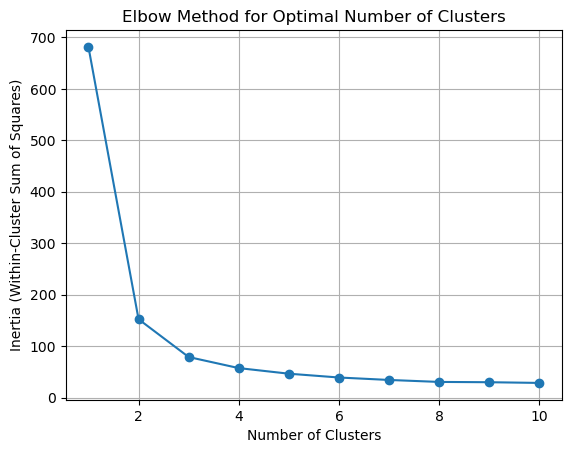

In [52]:
# Plot the Elbow curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

### Hierarchical Clustering 

<font size="5">Hierarchical clustering is a method of clustering that builds a hierarchy of clusters. It is commonly employed in data mining and machine learning to group similar data points into clusters.
</font>
  Steps in Agglomerative Hierarchical Clustering:
-  Initialization: Treat each data point as a single cluster.

-  Compute Distance Matrix: Calculate the distance between all pairs of clusters.

-  Merge Clusters: Combine the two closest clusters based on the linkage criterion.

-  Update Distance Matrix: Recalculate the distances between the new cluster and the remaining clusters.

-  Repeat: Continue merging until all data points are in one cluster or the desired number of clusters is reached.

### Hierarchical clustering is suitable for the Iris dataset for several reasons:

-  Unsupervised Nature
-  Dendrogram Visualization
-  No Need to Predefine Cluster Number
-  Handles Small Datasets Well
-  Captures Hierarchical Relationships

<font size="5">hierarchical clustering is a good choice for the Iris dataset because it allows for flexible clustering analysis and visualization of species relationships.</font>

In [64]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

In [65]:
iris = load_iris()
X = iris.data

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
linkage_matrix = linkage(X_scaled, method='ward')

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

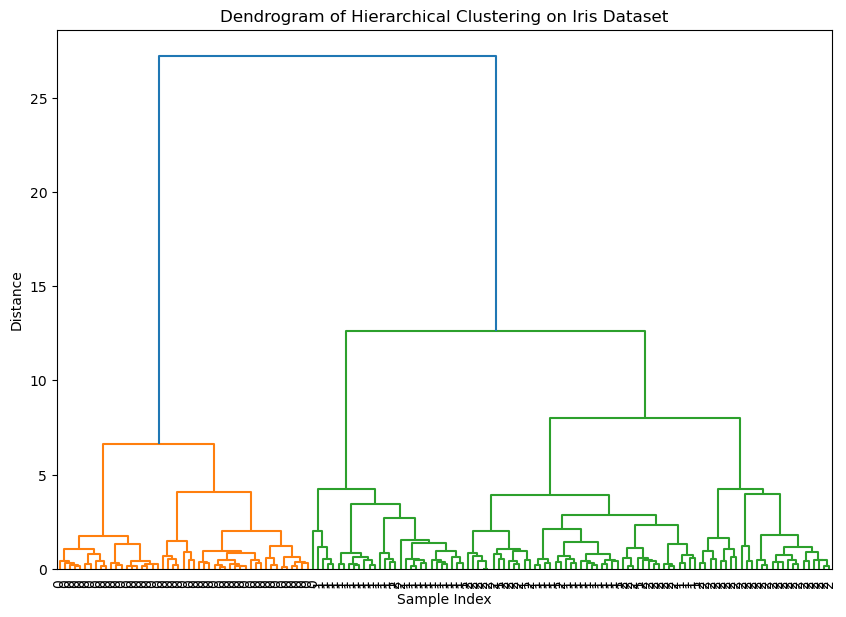

In [68]:
#Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=iris.target, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of Hierarchical Clustering on Iris Dataset')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

##### The dendrogram helps visualize how clusters are merged step by step.



In [69]:
num_clusters = 3
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Create a DataFrame for easy comparison
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = cluster_labels
df['Actual Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster Actual Species  
0        1         setosa  
1        1         setosa  
2        1         setosa  
3        1         setosa  
4        1         setosa  


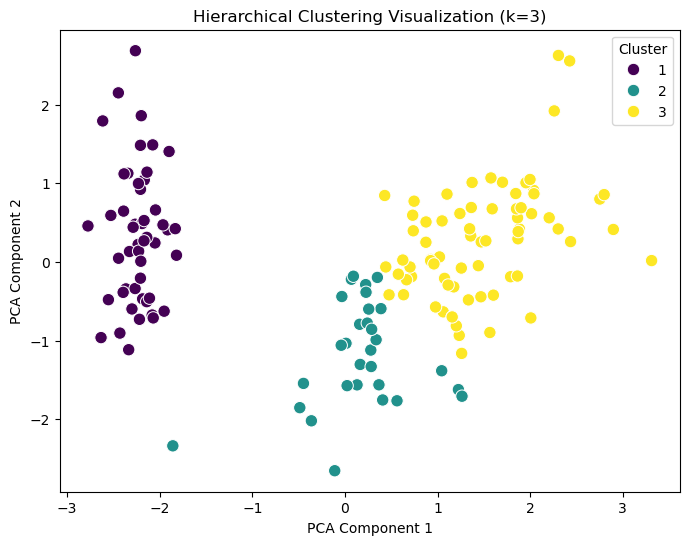

In [70]:
# Reduce dimensions to 2 using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=80)
plt.title('Hierarchical Clustering Visualization (k=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()